In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.4
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.01),
              metrics = ["accuracy"])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)              

In [16]:
# Tensorboard, ModelCheckpoint, EarlyStopping
# 需要文件夹和文件名
logdir = './callbacks/dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,  "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=10,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.8970 - accuracy: 0.2676 - val_loss: 1.0829 - val_accuracy: 0.5340
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7921 - accuracy: 0.6929 - val_loss: 0.8499 - val_accuracy: 0.6844
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5690 - accuracy: 0.8071 - val_loss: 0.4812 - val_accuracy: 0.8376
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4840 - accuracy: 0.8392 - val_loss: 0.4335 - val_accuracy: 0.8556
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4373 - accuracy: 0.8545 - val_loss: 0.4167 - val_accuracy: 0.8708
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4002 - accuracy: 0.8648 - val_loss: 0.4401 - val_accuracy: 0.8614
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3721 - accuracy: 0.8742 - val_loss: 0.3889 - val_accuracy:

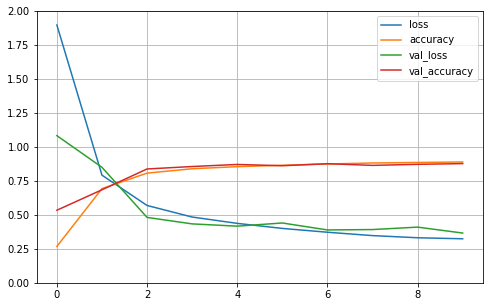

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()

plot_learning_curves(history)

In [20]:
# Loss, accuracy
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.38884642720222473, 0.8672000169754028]